## Importing

In [40]:
from PIL import Image, ImageDraw, ImageFont
import textwrap
import wikipedia

## Creating functions

In [56]:
img_size = (2048, 2048)
text_font = ImageFont.truetype("Mardoto-Bold.ttf", size=210)
desc_font = ImageFont.truetype("Mardoto-Thin.ttf", size=100)

def create_image():
    img = Image.new('RGBA', img_size, (230,230,230,255))
    draw = ImageDraw.Draw(img)
    return img, draw

def set_article(lang="en", article=None):
    wikipedia.set_lang(lang)
    res = wikipedia.search(article)[0]
    text = wikipedia.page(res).title
    if lang == "hy":
        desc_raw = wikipedia.summary(res, sentences=1)
        desc_raw = desc_raw[:desc_raw.find("։") + 1]
    else:
        desc_raw = wikipedia.summary(res, sentences=1)
    
    desc_raw = textwrap.fill(text=desc_raw, width=35)
    desc = desc_raw.split('\n')
    return res, text, desc

def set_text_position():
    text_position = (80, 550)

    line_position1 = (80, 800)
    line_position2 = (img_size[1] - line_position1[0], line_position1[1])
    line_position = line_position1 + line_position2

    desc_position = (line_position1[0], line_position1[1] + 50)
    return text_position, line_position, desc_position

def draw_image(draw, desc, desc_font, text, text_position, line_position, desc_position):
    for i in range(len(desc)):
        draw.text((80, desc_position[1] + i*120), desc[i], font=desc_font, fill=(0,0,0,255))
    
    draw.text(text_position, text, font=text_font, fill=(0,0,0,255))
    draw.line(line_position, fill=(0,0,0), width=1)

## Initializing the parameters

In [42]:
# Setting the text position
text_position, line_position, desc_position = set_text_position()

## Drawing an image

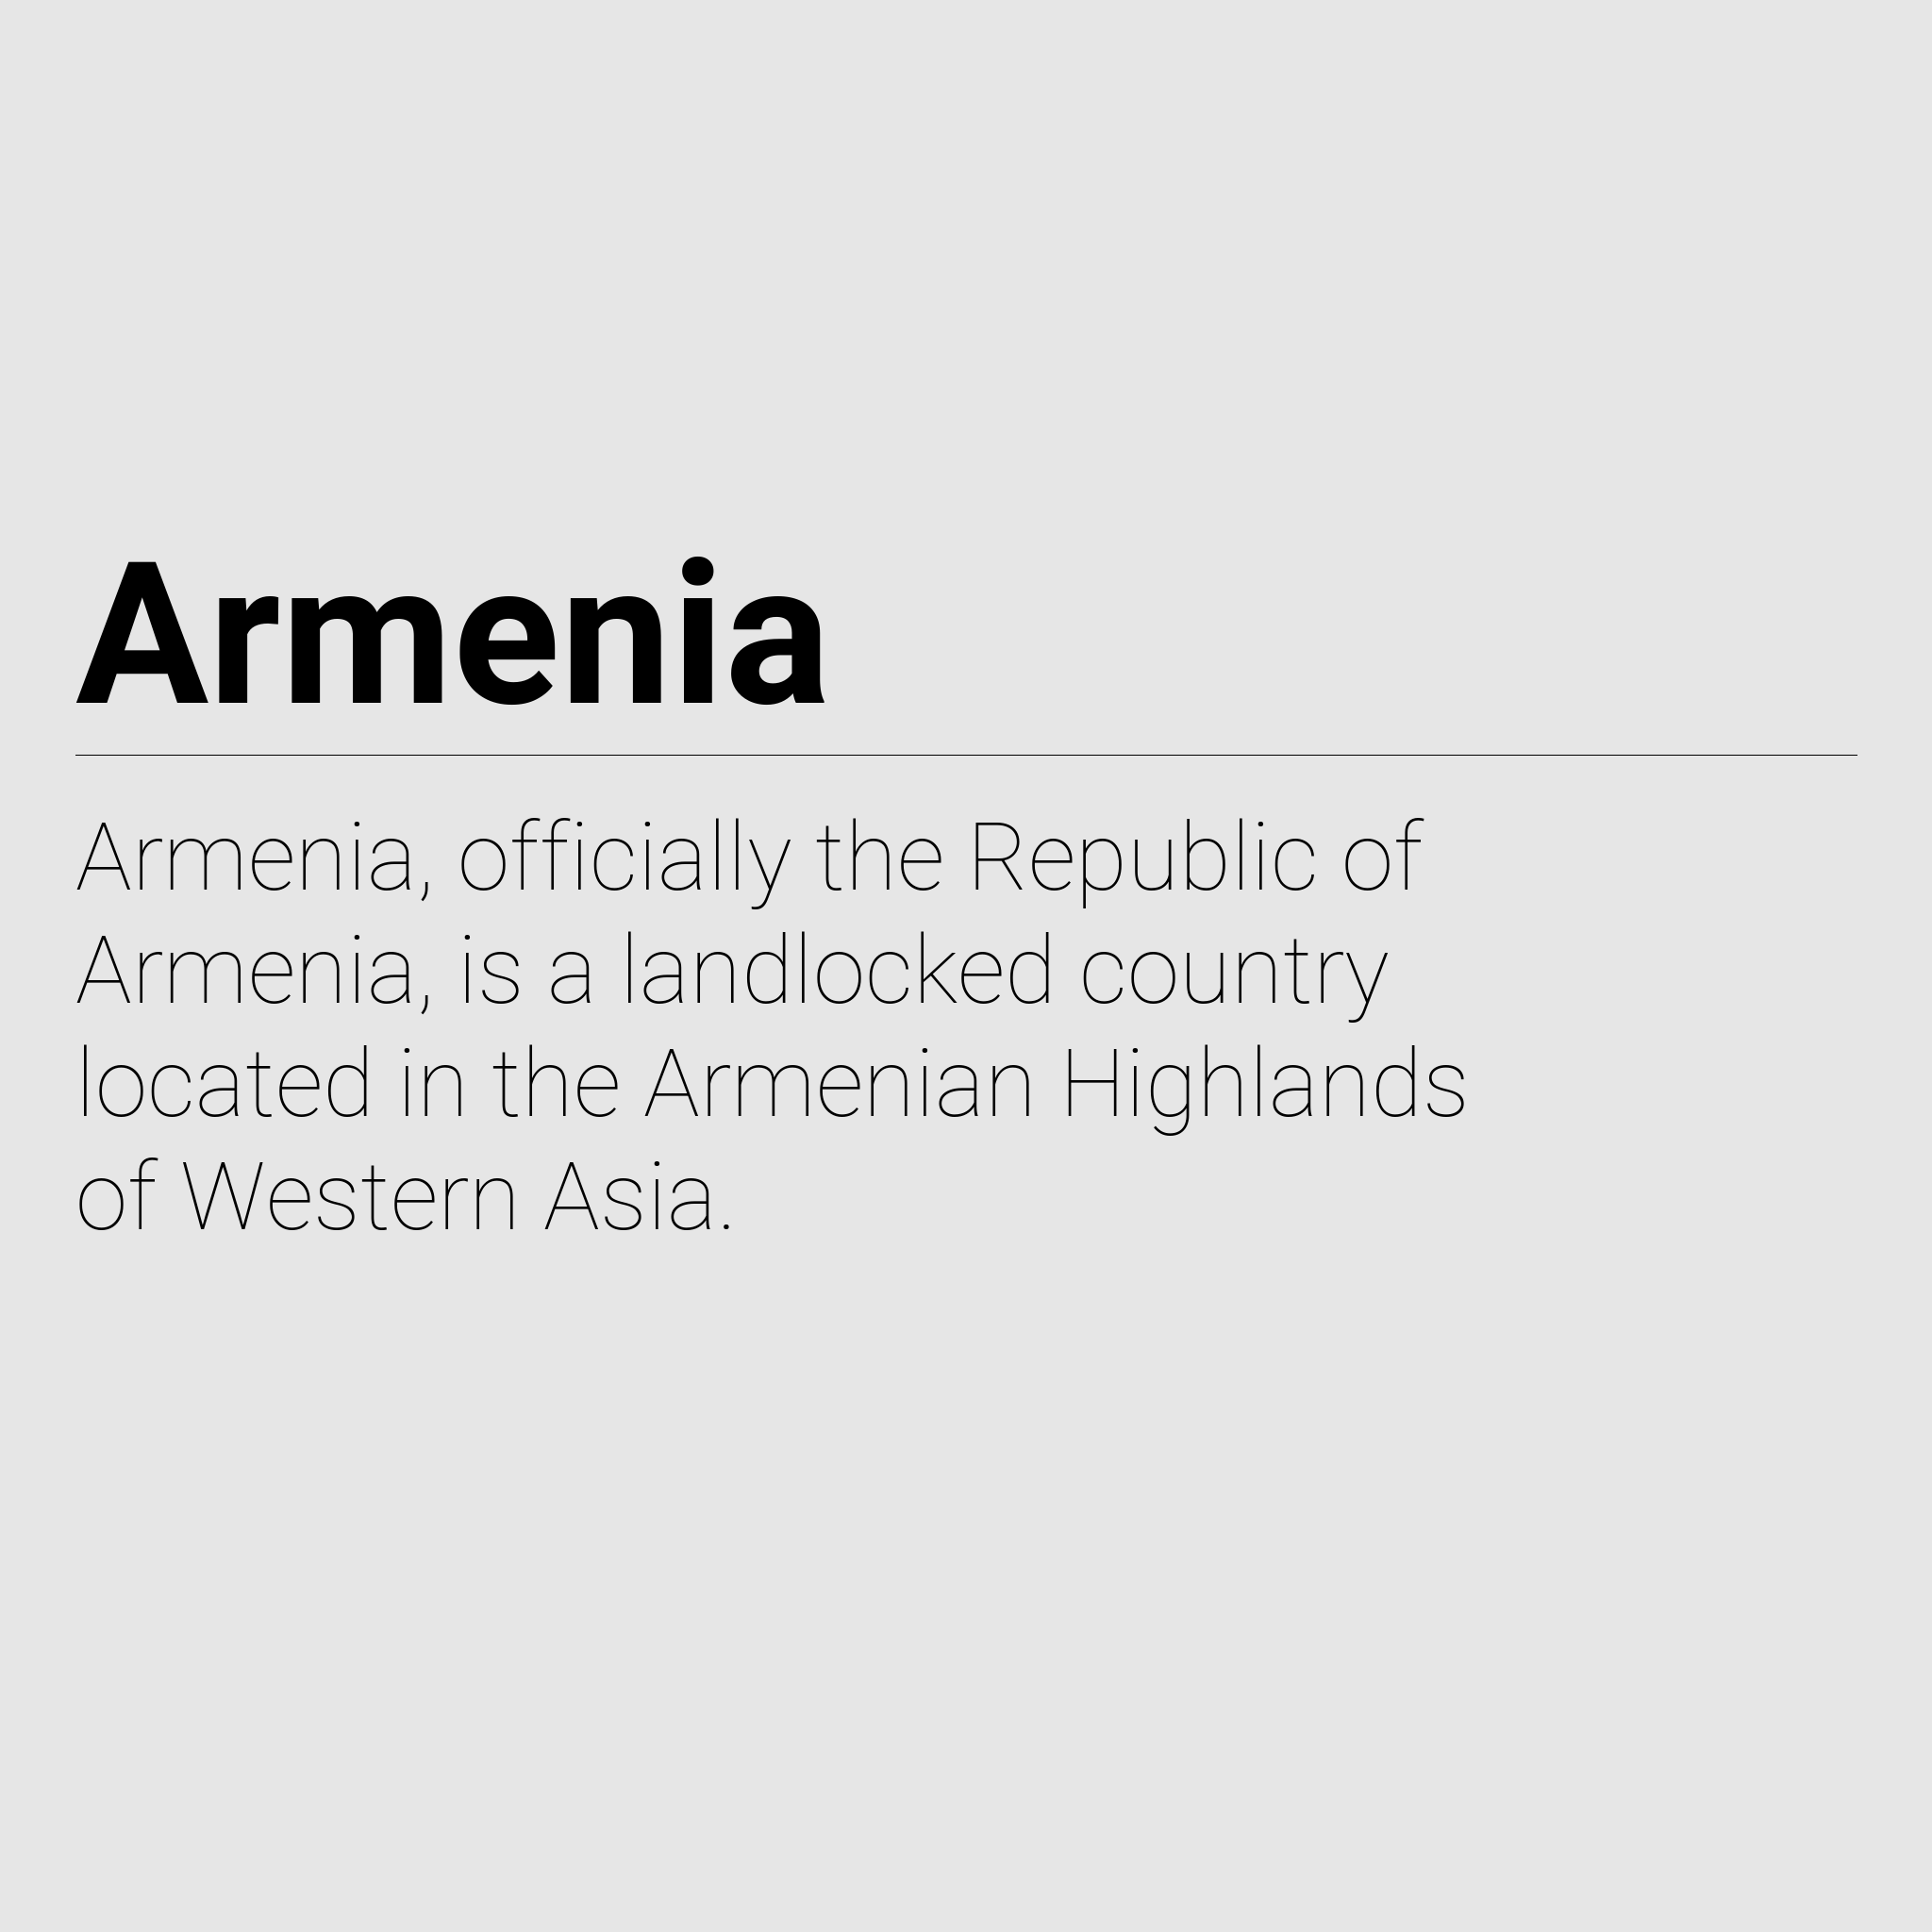

In [43]:
# Setting the parameters
res, text, desc = set_article(article="Armenia")

draw_image(draw, desc, desc_font, text, text_position, line_position, desc_position)
display(img)

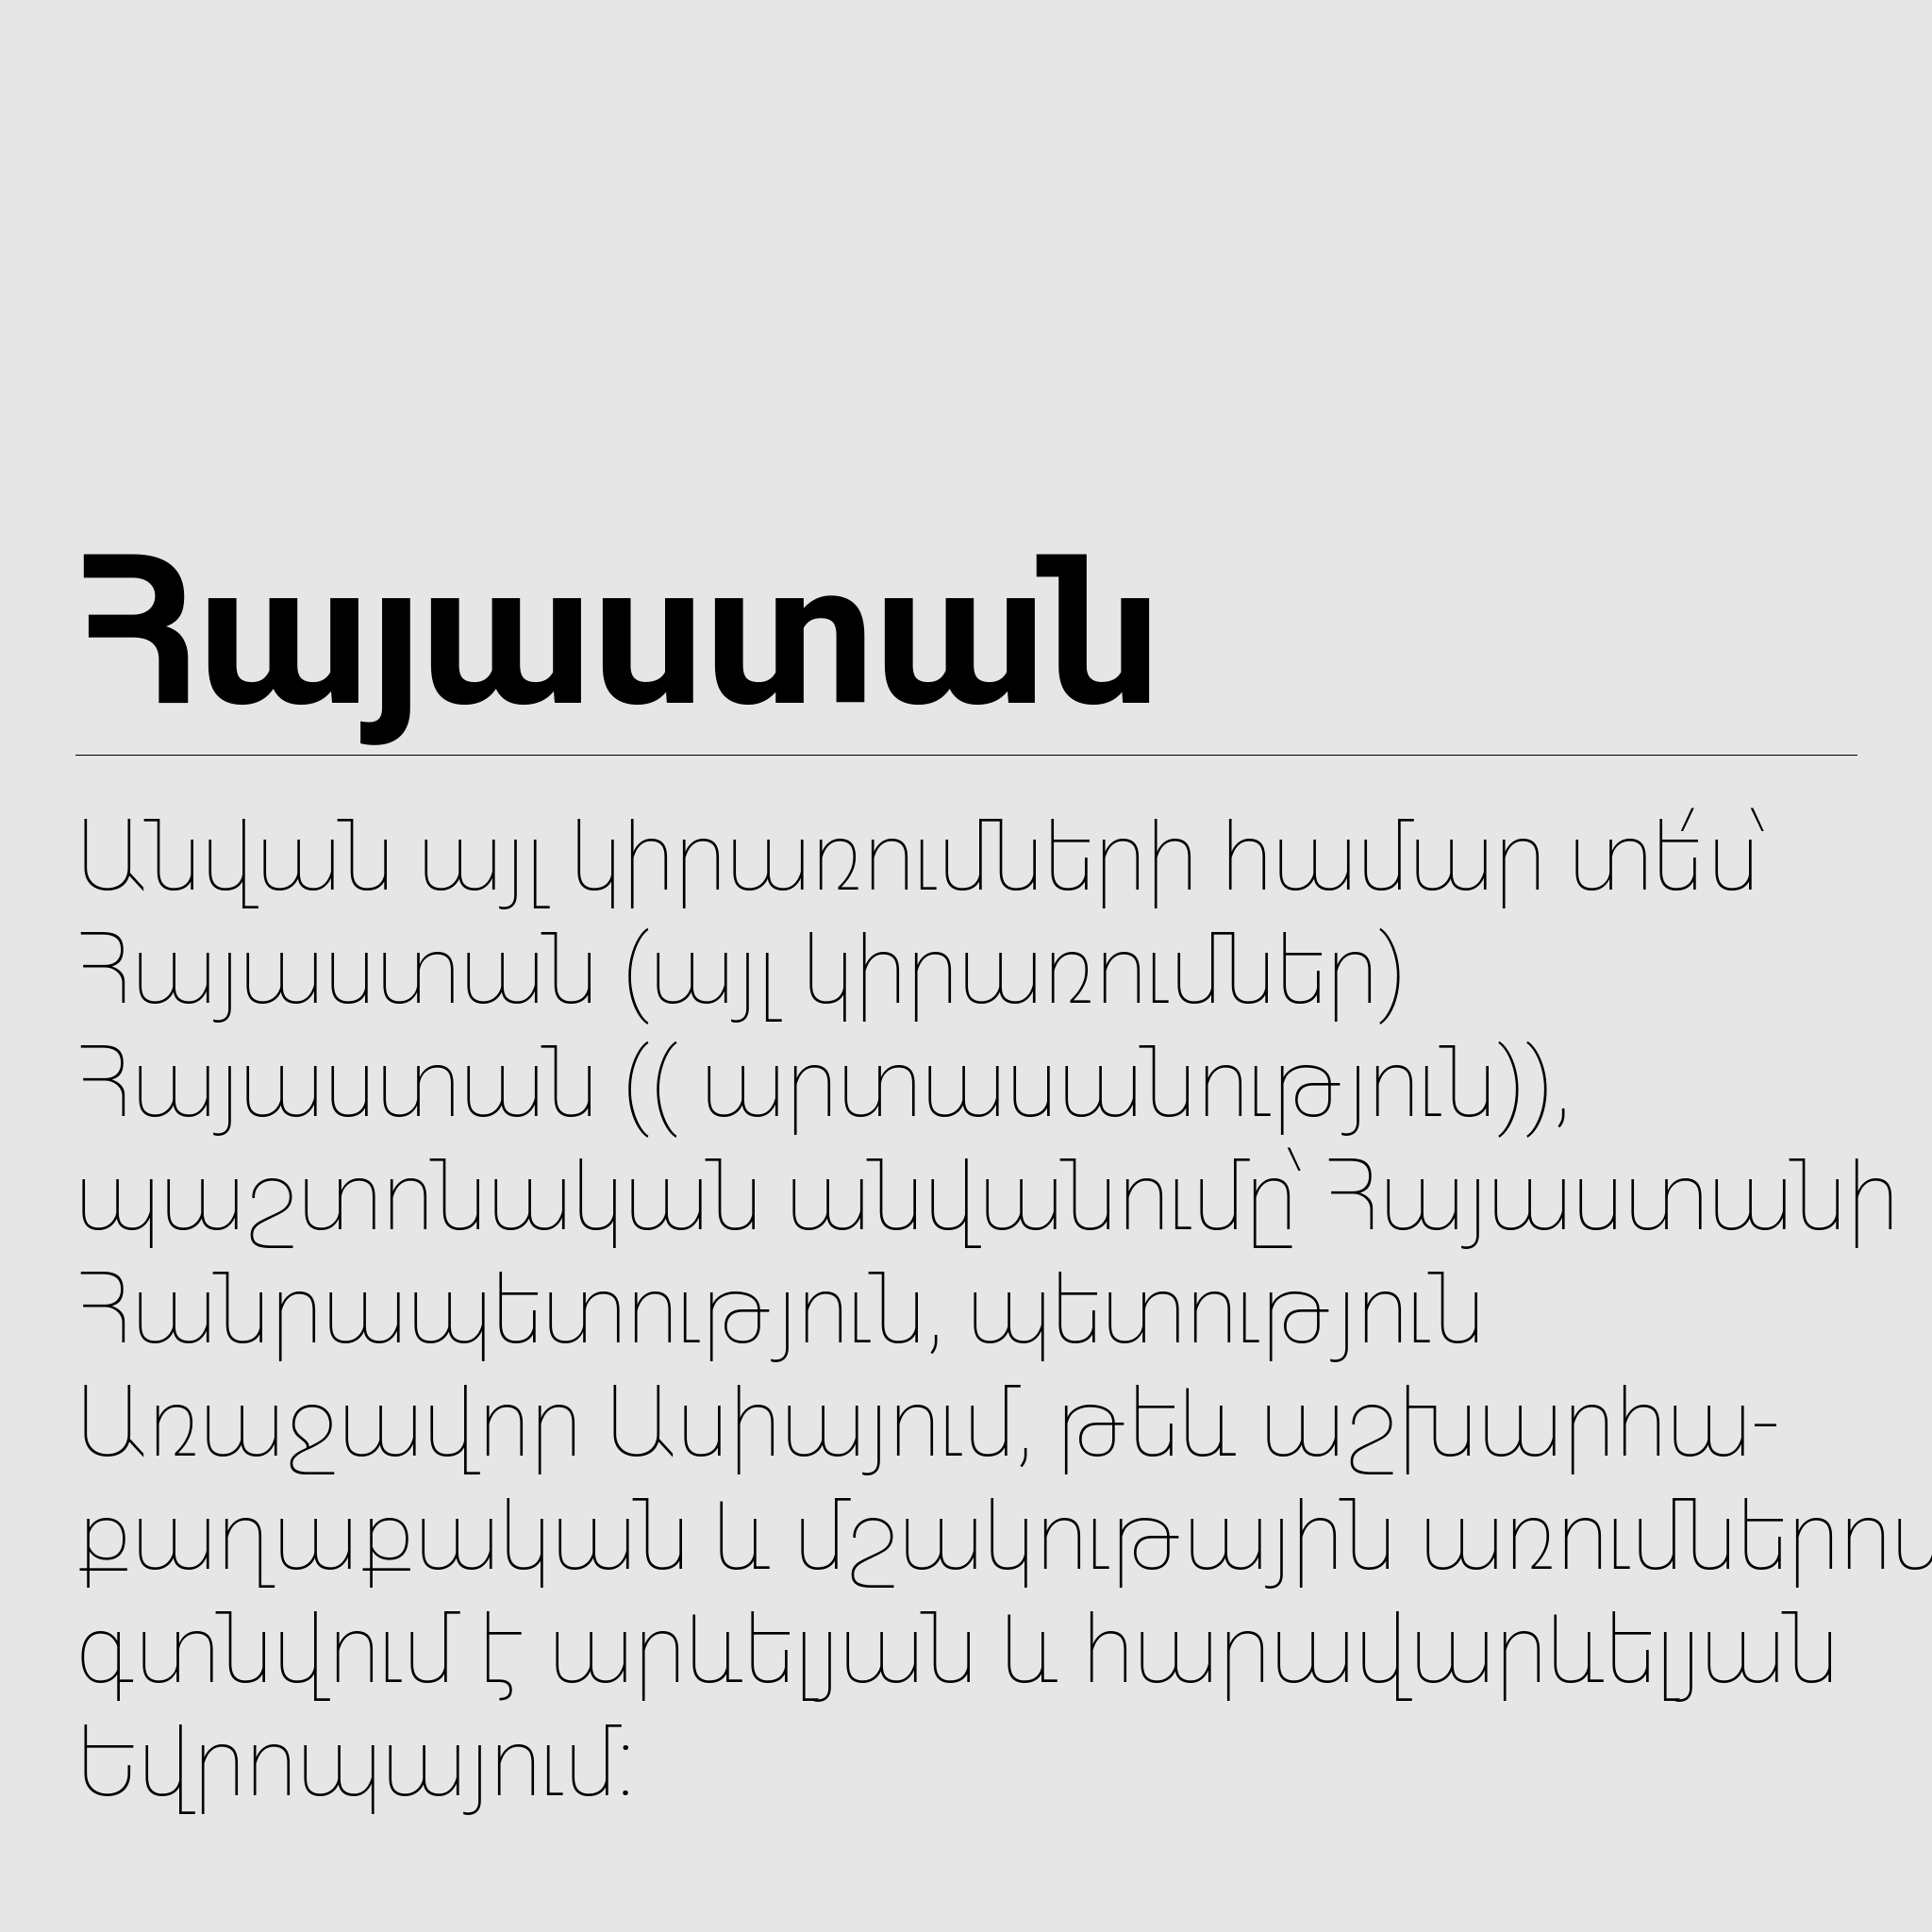

In [64]:
# Create an image
img, draw = create_image()

# Setting the parameters
res, text, desc = set_article(lang="hy", article="Armenia")

draw_image(draw, desc, desc_font, text, text_position, line_position, desc_position)
display(img)